<a href="https://colab.research.google.com/github/Fighter1303/hello-world/blob/main/%D0%9D%D0%B0%D0%B1%D1%96%D1%80_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%BF%D1%80%D0%BE_%D0%BE%D0%B1%E2%80%99%D1%94%D0%BA%D1%82%D0%B8_%D0%BD%D0%B5%D1%80%D1%83%D1%85%D0%BE%D0%BC%D0%BE%D1%81%D1%82%D1%96_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завантажте за посиланням набір даних про об’єкти нерухомості, проданих в окрузі King Count у період із травня 2014 по травень 2015 року. Докладніше про ці дані можна прочитати тут.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


# Збережіть дані у вигляді датафрейму Pandas (попередньо потрібно завантажити дані у форматі CSV, TSV або Excel).

In [ ]:
path = "/content/drive/MyDrive/main academy/датасеты/kc_house_data - kc_house_data.csv"
df = pd.read_csv(path)
df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [ ]:
df["price"].value_counts()


450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3625, dtype: int64

# Зобразіть розподіл цін на будинки (стовпець price) у вигляді гістограми. Підберіть кількість інтервалів (bins) експериментально. Додайте підпис до осі Ox та назву графіка.

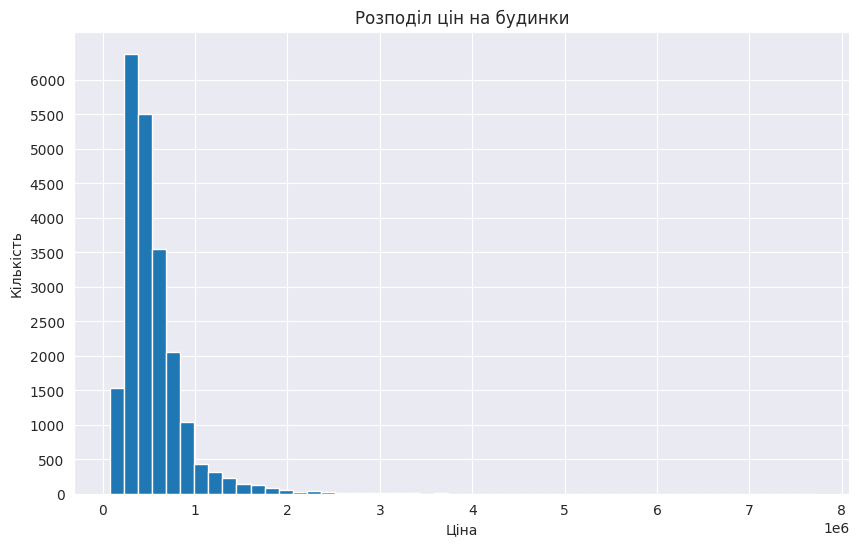

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=50)
plt.yticks (range(0,6500,500))
plt.title('Розподіл цін на будинки')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.show()

По осі x відображається ціна будинка, помножена на 10 в 6 степені(тобто 1000000).На графіку бачимо, що найбільше будинків з ціною в діапазоні 150-500 тисяч і потім йде плавне спадання, тобто: чим дорожче стають будинки, тим їх кількість у виборці зменшується.

# Побудуйте графік для візуалізації співвідношення загальної житлової площі (sqft_living) та ціни (price). Вкажіть параметри графіка:
# *   підпису до осей, назва графіка;
# *   тип маркера: circle; розмір: 20; колір зелений.


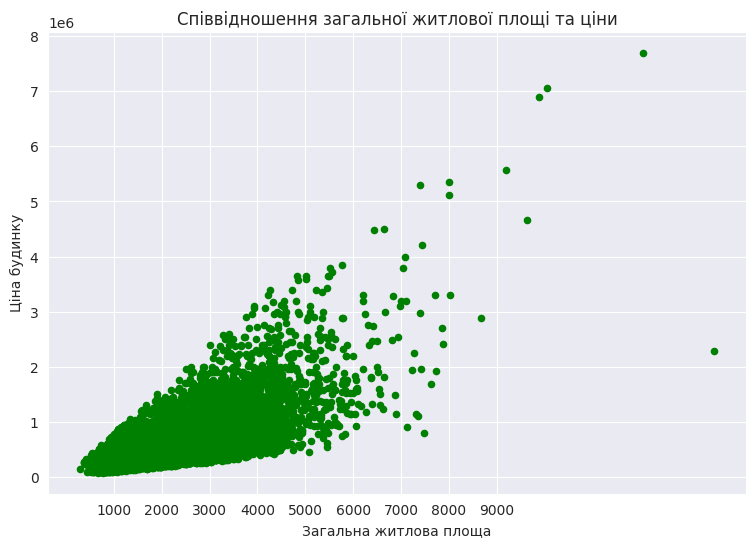

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(x=df["sqft_living"], y=df["price"], s=20, c='green', marker='o')
plt.xticks (range(1000,10000,1000))
plt.xlabel('Загальна житлова площа')
plt.ylabel('Ціна будинку')
plt.title('Співвідношення загальної житлової площі та ціни')
plt.show()

На даному графіку зображена зростаюча тенденція ціни будинку, яка збільшується при більшій загальній житловій площію.Проте в кожній точці x спостерігаєм різні значення по осі y, звідси можем зробити висновок, що загальна житлова площа не єдиний фактор, який впливає на ціну будинку.

In [ ]:
with_sea_view = df.loc[df["waterfront"] == 1, ["sqft_living", "price"]]
without_sea_view = df.loc[df["waterfront"] == 0, ["sqft_living", "price"]]



# Доповніть параметри попереднього графіка, щоб показати наявність/відсутність виду на море (стовпець waterfront). Зробіть розбиття на групи за ознакою waterfront шляхом поділу на два графіки. Яка з останніх двох візуалізацій наочніше доносить інформацію?

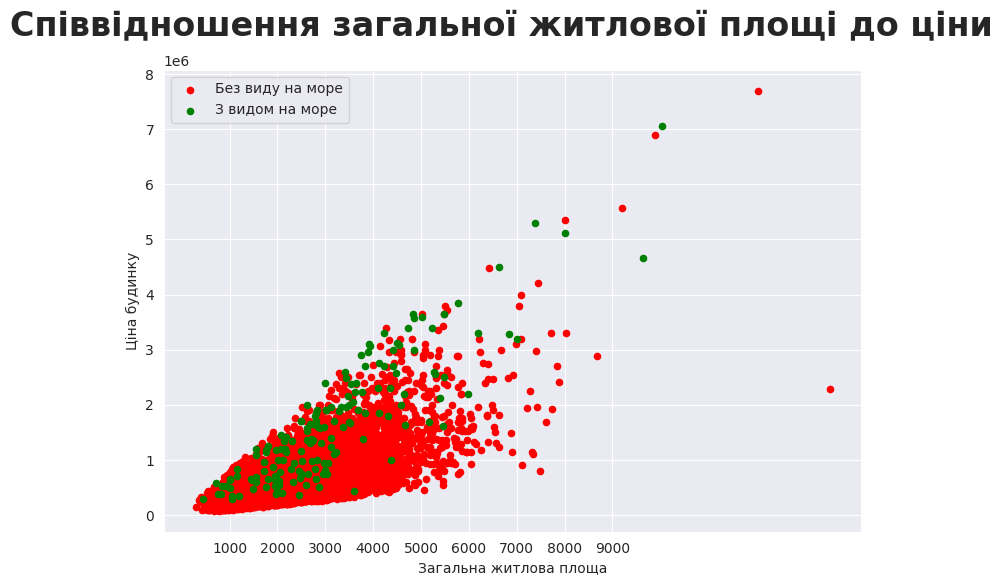

In [ ]:
fig = plt.figure(figsize=(9, 6))


plt.scatter(x=without_sea_view["sqft_living"], y=without_sea_view["price"], s=20, c='red', marker='o', label='Без виду на море')
plt.scatter(x=with_sea_view["sqft_living"], y=with_sea_view["price"], s=20, c='green', marker='o', label='З видом на море')
plt.xticks (range(1000,10000,1000))
plt.xlabel('Загальна житлова площа')
plt.ylabel('Ціна будинку')
fig.suptitle('Співвідношення загальної житлової площі до ціни', fontsize=24, weight='bold')
plt.legend()
plt.show()

По графіку можем зробити висновок, що квартири з видом на море з однаковою кількістю загально площі в більшості випадків дорожчі ніж без виду на море.

# Зобразіть розподіл року будівництва будинку (yr_built). Вкажіть параметри графіка.

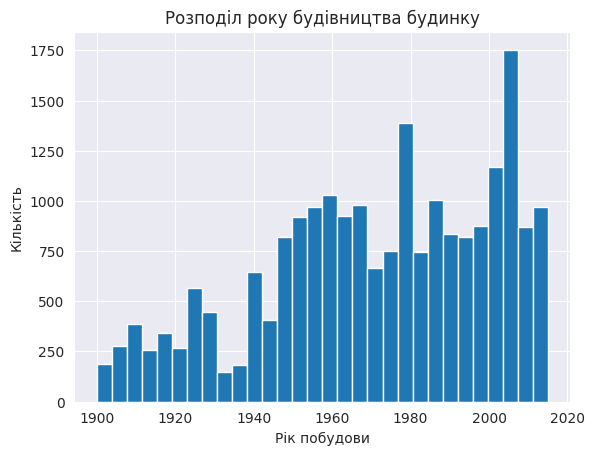

In [ ]:
plt.hist(df['yr_built'], bins=30)
plt.xlabel('Рік побудови')
plt.ylabel('Кількість')
plt.title('Розподіл року будівництва будинку')
plt.show()

Можем сказали про малу кількість будинків до 1950-х років, потім основна кількість це - 1950-1970,після чого йде зменшення і поступове наростаня аж до будинків сьогодення. Також є дві найбільші категорії будинків, це будинки збудовані в таких роках: 1980-1984 та 2000-2004

# Зображайте розподіл кількості будинків за загальною оцінкою (grade).

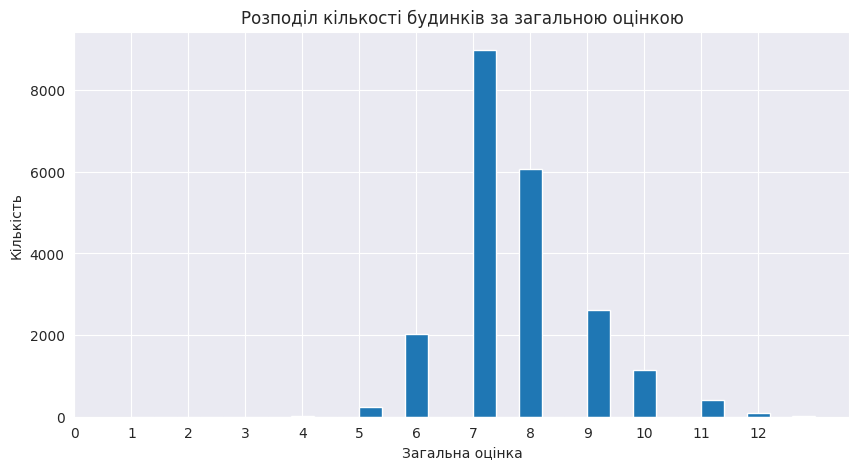

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['grade'], bins=30)
plt.xticks (range(0,13,1))
plt.xlabel('Загальна оцінка')
plt.ylabel('Кількість')
plt.title('Розподіл кількості будинків за загальною оцінкою')
plt.show()

Кількість будинків починає зростати з оцінкою 5 і зростає до піку - оцінка 7(більше 8000 будинків). далі йде плавний спад вниз до оцінки 12

# Зобразіть співвідношення між загальною оцінкою будинку (grade) та середньою
ціною будинків з даною оцінкою (перед цим необхідно провести відповідні обчислення).

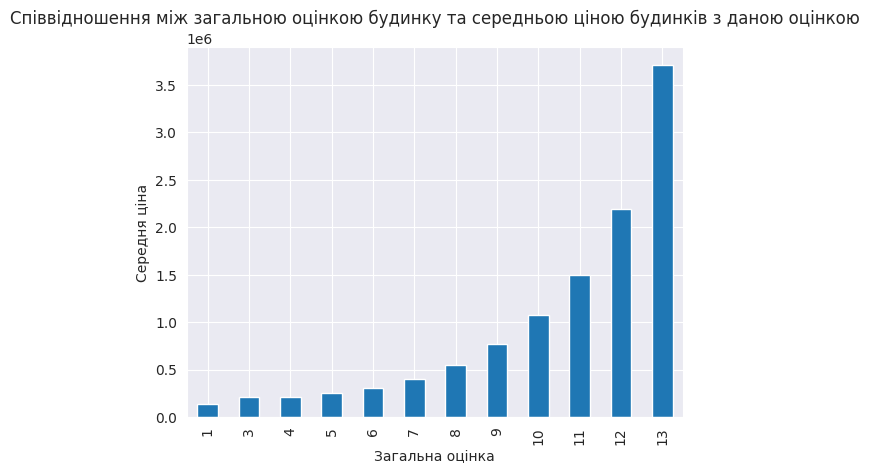

In [ ]:
df.groupby("grade")["price"].mean().plot(kind='bar')
plt.xlabel('Загальна оцінка')
plt.ylabel('Середня ціна')
plt.title('Співвідношення між загальною оцінкою будинку та середньою ціною будинків з даною оцінкою')
plt.show()

Спостерігаємо залежність середньої ціни будинку від загальної оцінки, починаючи з цін від 250 тис ця залежність проявляє себе більше і до самого піку.Можем зробити висновок, що ціна будинків залежить від їх загальної оцінки, особливо для дорожчих будинків.

# Зобразіть на двох сусідніх графіках (із загальною віссю Oy) розподіл будинків за кількістю спалень (bedrooms) та ванних кімнат (bathrooms).

In [ ]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Бачимо один будинок у виборці з 'аномальною' кількістю спалень у виборці 33

In [ ]:
q = df.loc[df["bedrooms"] < 30, ["bedrooms"]]

Не будем використовувати цей будинок у нашій візуалізації, занадто велика різниця між даними

In [ ]:
df["bathrooms"] = round(df["bathrooms"])

<Figure size 1500x1000 with 0 Axes>

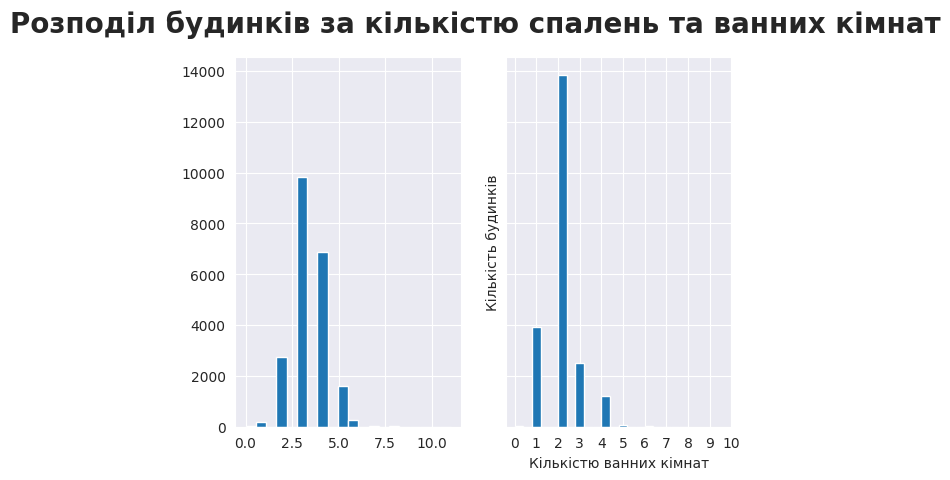

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(q, bins=20)
plt.xticks (range(0,12,1))
plt.xlabel('Кількість спалень')
plt.ylabel('Кількість будинків')

ax2.hist(df["bathrooms"], bins=20)
plt.xticks (range(0,11,1))
plt.xlabel('Кількістю ванних кімнат')


fig.suptitle('Розподіл будинків за кількістю спалень та ванних кімнат', fontsize=20, weight='bold')
plt.show()


Набільша кількість будинків з трьома спальнями, потім кількість спадає...Щодо ванних кімнат - то таких будинків найбільше з двома ванними кімнатами.Така кількість спалень і ванних кімнат нормальна для більшості будинків

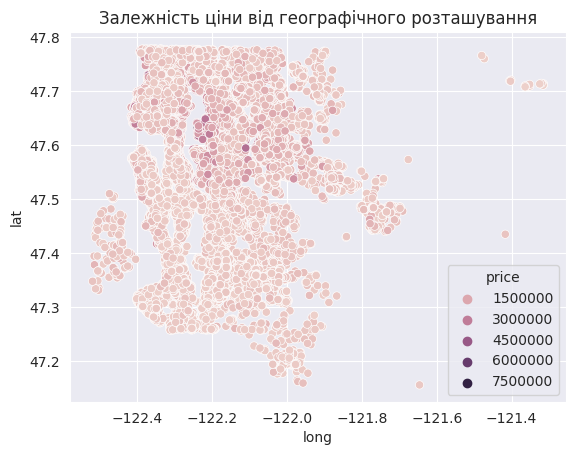

In [ ]:
sns.scatterplot(x="long", y="lat", data=df, hue='price')
plt.title('Залежність ціни від географічного розташування')
plt.show()

Квартири на північному-заході більш дорожчі